# Assignment 5

In this Assignment, We will go through the convolutional neural networks and their implementation in TensorFlow. But first we will start with a simple implementation of a 2-dimentional convolution with an example of edge detector. In the second section, we will work on the MNIST dataset using Tensorflow. 

## Task 1

In this task, we will be implementing an edge filter on an image. The image choosner for this task have some well defined vertical structural lines in it to make the results more apparent. The original image and the filtered image botha are being displayed for comparision.

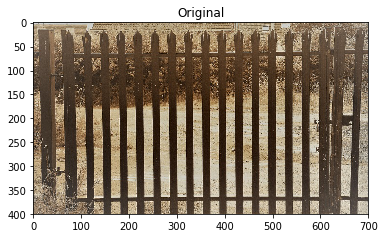

Shape of image:  (400, 700, 3)


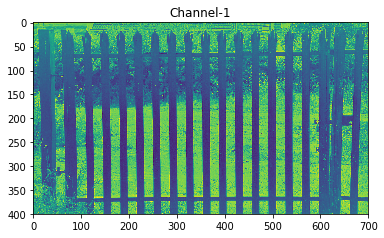

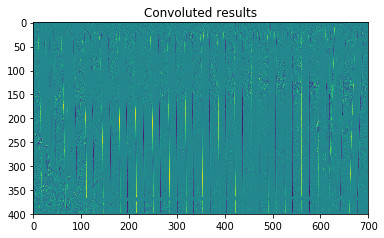

In [7]:
from pylab import *
import numpy as np
%matplotlib inline

# importing the data
img = imread("railings.jpg")
imshow(img)
title("Original")
show()
print("Shape of image: ", img.shape)

# choosing the channel
X = img[:, :, 0]
imshow(X)
title("Channel-1")
show()

# making filter
filt = np.array([[1, -1], [1, -1]])

# applying 2-d convolution
filtered = np.zeros(X.shape)
fs = filt.shape
for i in range(X.shape[0]):
    if i == X.shape[0]-fs[0]:
        break
    for j in range(X.shape[1]):
        if j == X.shape[1]-fs[1]:
            break
        filtered[i][j] = np.sum(np.multiply(X[i:i+fs[0], j:j+fs[1]], filt))

# Show results
imshow(filtered)
title("Filtered results")
show()

## Task 2

In this task, we will use Tensorflow libraries to implement a convolutional neural network on the MNIST data. 

##### 2.1
program code in __MNIST_conv1.ipynb__

##### 2.2
program code in __MNIST_conv3.ipynb__

##### 2.3

The file _MNIST_conv1.ipynb_ contains the code for convolutional neural network with 1 convolution layer and results are being stored in _results_conv1.txt_ file. All the other results from programs with 2 and 3 convolutional layers are stored in the same manner. The _.ipynb_ files containing these programs need to be run first in order to generate the output files. After the execution of these programs, the evaluation script written below can be run successfully.

accuracies in order :  [99.173814 94.58     94.82    ]


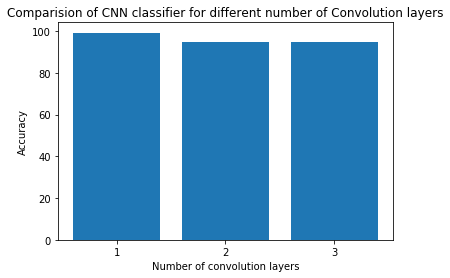

losses in order :  [0.03258678 0.18020159 0.17655016]


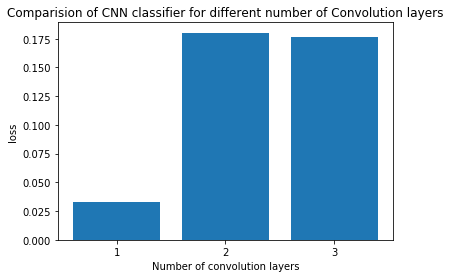

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

conv1 = eval(open("results_conv1.txt", "r").read())
conv2 = eval(open("results_conv2.txt", "r").read())
conv3 = eval(open("results_conv3.txt", "r").read())

accuracies = np.array([conv1["accuracy"],
                       conv2["accuracy"],
                       conv3["accuracy"]])*100

losses = np.array([conv1["loss"],
                       conv2["loss"],
                       conv3["loss"]])
print("accuracies in order : ", accuracies)
plt.bar(np.arange(1,4), accuracies)
plt.xticks(np.arange(1,4))
plt.ylabel("Accuracy")
plt.xlabel("Number of convolution layers")
plt.title("Comparision of CNN classifier for different number of Convolution layers")
plt.show()

print("losses in order : ", losses)
plt.bar(np.arange(1,4), losses)
plt.xticks(np.arange(1,4))
plt.ylabel("final loss")
plt.xlabel("Number of convolution layers")
plt.title("Comparision of CNN classifier for different number of Convolution layers")
plt.show()

The results show that the classifier worked best when only one convolution layer was used. The loss was reduced upto 0.03 in the case with 1 convolution layer while reduced till 1.8 and 1.75 in the case of 2 and 3 convolution layer respectively. These types of results are genearlly seen in the case of overfitting of the model where use of more than needed convolution layers leads to high validation error. Clearly, overfitting is being observed here in the case of 2 and 3 convolution layers. 

#### 2.4

In this section we will introduce noise in the training labels and will train the model onn noisy data, then we will evaluate the model against validation dataset and then show the results.

In [16]:
# Copyright 2016 The TensorFlow Authors. All Rights Reserved.
#
#  Licensed under the Apache License, Version 2.0 (the "License");
#  you may not use this file except in compliance with the License.
#  You may obtain a copy of the License at
#
#   http://www.apache.org/licenses/LICENSE-2.0
#
#  Unless required by applicable law or agreed to in writing, software
#  distributed under the License is distributed on an "AS IS" BASIS,
#  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
#  See the License for the specific language governing permissions and
#  limitations under the License.
"""Convolutional Neural Network Estimator for MNIST, built with tf.layers."""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import sys

# tf.logging.set_verbosity(tf.logging.INFO)
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
num_classes = len(classes)
losses = []


def my_cnn_model_fn(features, labels, mode):
    """Model function for CNN."""
    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, width, height, channels]
    # MNIST images are 28x28 pixels, and have one color channel
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1])

    # Convolutional Layer #1
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 28, 28, 1]
    # Output Tensor Shape: [batch_size, 28, 28, 32]
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 28, 28, 32]
    # Output Tensor Shape: [batch_size, 14, 14, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)

    # Convolutional Layer #2
    # Computes 64 features using a 5x5 filter.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 14, 14, 32]
    # Output Tensor Shape: [batch_size, 14, 14, 64]
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)

    # Pooling Layer #2
    # Second max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 14, 14, 64]
    # Output Tensor Shape: [batch_size, 7, 7, 64]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 7, 7, 64]
    # Output Tensor Shape: [batch_size, 7 * 7 * 64]
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 7 * 7 * 64]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 10]
    logits = tf.layers.dense(inputs=dropout, units=num_classes)

    predictions = {
        # Generate predictions (for PREDICT and EVAL mode)
        "classes": tf.argmax(input=logits, axis=1),
        # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
        # `logging_hook`.
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    losses.append(loss)
    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    #  Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

#  # Load training and eval data
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = mnist.train.images  # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)


def add_noise(labels, percent):
    labels = np.copy(labels)
    indexes = np.random.choice(len(labels),
                               int((len(labels)*percent)/100), replace=False)
    print("indexes:", len(indexes))
    temp = labels[indexes]
    temp2 = np.unique(temp)
    print("introducing noise in data...")
    for i in range(len(temp)):
        temp[i] = np.random.choice(temp2[np.where(temp2!=temp[i])])
    labels[indexes] = temp
    print("done adding noise.")
    return labels


def train_and_validate(train_labels):
    indices = np.isin(train_labels, classes)
    sample_train_data = train_data[indices, :]
    sample_train_labels = train_labels[indices]

    eval_data = mnist.test.images  # Returns np.array
    eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
    indices_test = np.isin(eval_labels, classes)
    sample_eval_data = eval_data[indices_test, :]
    sample_eval_labels = eval_labels[indices_test]

    # Create the Estimator
    mnist_classifier = tf.estimator.Estimator(
        model_fn=my_cnn_model_fn)  # , model_dir="/tmp/mnist_convnet_model")

    # Train the model
    train_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_train_data},
        y=sample_train_labels,
        batch_size=10,
        num_epochs=None,
        shuffle=True)
    mnist_classifier.train(
        input_fn=train_input_fn,
        steps=10000)

    # Evaluate the model and print results
    eval_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"x": sample_eval_data},
        y=sample_eval_labels,
        batch_size=10,
        num_epochs=1,
        shuffle=False)
    eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
    print(eval_results)
    return eval_results

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz


Adding 10% noise to the trainig labels and saving the results in eval_results_10_noise

In [45]:
train_labels_noisy = add_noise(train_labels, percent=10)
eval_results_10_noise = train_and_validate(train_labels_noisy)

indexes: 5500
introducing noise in data...
done adding noise.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shakti\\AppData\\Local\\Temp\\tmpotakjmo5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CDCB91C7B8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving check

INFO:tensorflow:global_step/sec: 11.4245
INFO:tensorflow:loss = 1.318836, step = 7101 (8.750 sec)
INFO:tensorflow:global_step/sec: 11.9124
INFO:tensorflow:loss = 0.17948903, step = 7201 (8.394 sec)
INFO:tensorflow:global_step/sec: 11.3279
INFO:tensorflow:loss = 0.74215823, step = 7301 (8.851 sec)
INFO:tensorflow:global_step/sec: 11.2325
INFO:tensorflow:loss = 0.6187951, step = 7401 (8.879 sec)
INFO:tensorflow:global_step/sec: 11.064
INFO:tensorflow:loss = 0.6809809, step = 7501 (9.043 sec)
INFO:tensorflow:global_step/sec: 10.4677
INFO:tensorflow:loss = 0.54031205, step = 7601 (9.546 sec)
INFO:tensorflow:global_step/sec: 11.1934
INFO:tensorflow:loss = 0.7025658, step = 7701 (8.947 sec)
INFO:tensorflow:global_step/sec: 11.3406
INFO:tensorflow:loss = 1.2971258, step = 7801 (8.821 sec)
INFO:tensorflow:global_step/sec: 11.2709
INFO:tensorflow:loss = 1.120061, step = 7901 (8.860 sec)
INFO:tensorflow:global_step/sec: 11.3872
INFO:tensorflow:loss = 1.6177235, step = 8001 (8.780 sec)
INFO:tenso

Adding 25% noise to the trainig labels and saving the results in eval_results_25_noise

In [18]:
train_labels_noisy = add_noise(train_labels, percent=25)
eval_results_25_noise = train_and_validate(train_labels_noisy)

indexes: 13750
introducing noise in data...
done adding noise.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shakti\\AppData\\Local\\Temp\\tmp0mg6qryc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CDC5AF2DD8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving chec

INFO:tensorflow:global_step/sec: 19.9045
INFO:tensorflow:loss = 1.0636977, step = 7201 (5.008 sec)
INFO:tensorflow:global_step/sec: 20.0721
INFO:tensorflow:loss = 0.9183635, step = 7301 (4.982 sec)
INFO:tensorflow:global_step/sec: 20.0528
INFO:tensorflow:loss = 1.9699786, step = 7401 (4.987 sec)
INFO:tensorflow:global_step/sec: 19.8779
INFO:tensorflow:loss = 1.8236033, step = 7501 (5.048 sec)
INFO:tensorflow:global_step/sec: 19.3874
INFO:tensorflow:loss = 0.91537493, step = 7601 (5.141 sec)
INFO:tensorflow:global_step/sec: 20.049
INFO:tensorflow:loss = 1.1074635, step = 7701 (4.988 sec)
INFO:tensorflow:global_step/sec: 19.9677
INFO:tensorflow:loss = 1.2802752, step = 7801 (5.008 sec)
INFO:tensorflow:global_step/sec: 20.2452
INFO:tensorflow:loss = 1.6656502, step = 7901 (4.939 sec)
INFO:tensorflow:global_step/sec: 17.4734
INFO:tensorflow:loss = 1.1273893, step = 8001 (5.723 sec)
INFO:tensorflow:global_step/sec: 20.0334
INFO:tensorflow:loss = 2.196646, step = 8101 (5.007 sec)
INFO:tensor

Adding 50% noise to the trainig labels and saving the results in eval_results_50_noise

In [19]:
train_labels_noisy = add_noise(train_labels, percent=50)
eval_results_50_noise = train_and_validate(train_labels_noisy)

indexes: 27500
introducing noise in data...
done adding noise.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shakti\\AppData\\Local\\Temp\\tmpd9bltk4r', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CDC57CA5C0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving chec

INFO:tensorflow:global_step/sec: 18.8317
INFO:tensorflow:loss = 1.8831799, step = 7201 (5.308 sec)
INFO:tensorflow:global_step/sec: 18.7086
INFO:tensorflow:loss = 2.132078, step = 7301 (5.345 sec)
INFO:tensorflow:global_step/sec: 18.6971
INFO:tensorflow:loss = 1.9746288, step = 7401 (5.348 sec)
INFO:tensorflow:global_step/sec: 16.6523
INFO:tensorflow:loss = 1.7819144, step = 7501 (6.005 sec)
INFO:tensorflow:global_step/sec: 18.5929
INFO:tensorflow:loss = 2.190829, step = 7601 (5.378 sec)
INFO:tensorflow:global_step/sec: 17.7821
INFO:tensorflow:loss = 1.8626, step = 7701 (5.627 sec)
INFO:tensorflow:global_step/sec: 18.6093
INFO:tensorflow:loss = 2.4126992, step = 7801 (5.375 sec)
INFO:tensorflow:global_step/sec: 18.7751
INFO:tensorflow:loss = 1.4077753, step = 7901 (5.322 sec)
INFO:tensorflow:global_step/sec: 18.6269
INFO:tensorflow:loss = 2.0944207, step = 8001 (5.369 sec)
INFO:tensorflow:global_step/sec: 18.8879
INFO:tensorflow:loss = 1.9948775, step = 8101 (5.310 sec)
INFO:tensorflow

Adding 75% noise to the trainig labels and saving the results in eval_results_75_noise

In [24]:
train_labels_noisy = add_noise(train_labels, percent=75)
eval_results_75_noise = train_and_validate(train_labels_noisy)

indexes: 41250
introducing noise in data...
done adding noise.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shakti\\AppData\\Local\\Temp\\tmpmnklx8mb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CDC6416F28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving chec

INFO:tensorflow:global_step/sec: 16.3812
INFO:tensorflow:loss = 2.2815108, step = 7201 (6.106 sec)
INFO:tensorflow:global_step/sec: 15.4421
INFO:tensorflow:loss = 2.3357375, step = 7301 (6.476 sec)
INFO:tensorflow:global_step/sec: 15.6767
INFO:tensorflow:loss = 2.2736657, step = 7401 (6.381 sec)
INFO:tensorflow:global_step/sec: 17.2298
INFO:tensorflow:loss = 2.1712058, step = 7501 (5.815 sec)
INFO:tensorflow:global_step/sec: 13.9186
INFO:tensorflow:loss = 2.3180687, step = 7601 (7.169 sec)
INFO:tensorflow:global_step/sec: 17.8081
INFO:tensorflow:loss = 2.3632755, step = 7701 (5.618 sec)
INFO:tensorflow:global_step/sec: 14.3554
INFO:tensorflow:loss = 2.1751842, step = 7801 (6.966 sec)
INFO:tensorflow:global_step/sec: 14.6675
INFO:tensorflow:loss = 2.2687764, step = 7901 (6.817 sec)
INFO:tensorflow:global_step/sec: 15.791
INFO:tensorflow:loss = 2.1768358, step = 8001 (6.331 sec)
INFO:tensorflow:global_step/sec: 17.1983
INFO:tensorflow:loss = 2.306303, step = 8101 (5.837 sec)
INFO:tensorf

Adding 100% noise to the trainig labels and saving the results in eval_results_100_noise

In [32]:
train_labels_noisy = add_noise(train_labels, percent=100)
eval_results_100_noise = train_and_validate(train_labels_noisy)

indexes: 55000
introducing noise in data...
done adding noise.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Shakti\\AppData\\Local\\Temp\\tmp1z6ze0uq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001CDCB90DAC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving chec

INFO:tensorflow:global_step/sec: 12.3747
INFO:tensorflow:loss = 2.2513921, step = 7201 (8.085 sec)
INFO:tensorflow:global_step/sec: 13.6095
INFO:tensorflow:loss = 2.2837055, step = 7301 (7.343 sec)
INFO:tensorflow:global_step/sec: 11.9198
INFO:tensorflow:loss = 2.3184776, step = 7401 (8.394 sec)
INFO:tensorflow:global_step/sec: 12.6939
INFO:tensorflow:loss = 2.2966092, step = 7501 (7.873 sec)
INFO:tensorflow:Saving checkpoints for 7563 into C:\Users\Shakti\AppData\Local\Temp\tmp1z6ze0uq\model.ckpt.
INFO:tensorflow:global_step/sec: 13.0194
INFO:tensorflow:loss = 2.2442594, step = 7601 (7.681 sec)
INFO:tensorflow:global_step/sec: 11.9854
INFO:tensorflow:loss = 2.314059, step = 7701 (8.343 sec)
INFO:tensorflow:global_step/sec: 12.0885
INFO:tensorflow:loss = 2.3109233, step = 7801 (8.281 sec)
INFO:tensorflow:global_step/sec: 12.3972
INFO:tensorflow:loss = 2.2813718, step = 7901 (8.057 sec)
INFO:tensorflow:global_step/sec: 12.1745
INFO:tensorflow:loss = 2.2802231, step = 8001 (8.214 sec)
IN

The Results are shown in form of bar graphs below.

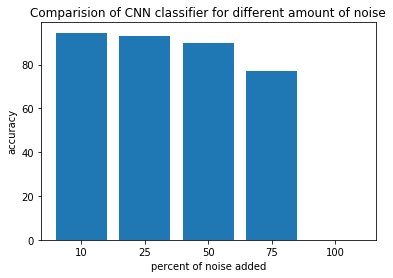

The accuracy when 10% noise is added:  94.55999732017517 %
The accuracy when 25% noise is added:  93.11000108718872 %
The accuracy when 50% noise is added:  89.92999792098999 %
The accuracy when 75% noise is added:  76.910001039505 %
The accuracy when 100% noise is added:  0.050000002374872565 %


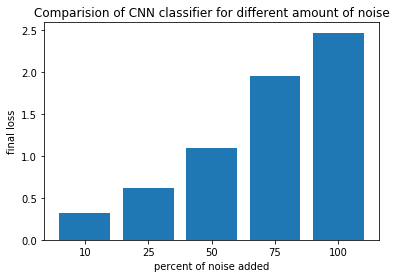

loss when 10% noise is added:  0.32484993
loss when 25% noise is added:  0.62093115
loss when 50% noise is added:  1.0973458
loss when 75% noise is added:  1.9554924
loss when 100% noise is added:  2.4647522


In [47]:
accuracies_noisyData = np.array([eval_results_10_noise["accuracy"],
                                   eval_results_25_noise["accuracy"],
                                    eval_results_50_noise["accuracy"],
                                eval_results_75_noise["accuracy"],
                                eval_results_100_noise["accuracy"]])*100

ticks = np.array(["10","25","50","75", "100"])
plt.bar(np.arange(1,6), accuracies_noisyData)
plt.xticks(np.arange(1,6), ticks)
plt.ylabel("accuracy")
plt.xlabel("percent of noise added")
plt.title("Comparision of CNN classifier for different amount of noise")
plt.show()
print("The accuracy when 10% noise is added: ", eval_results_10_noise["accuracy"]*100, "%")
print("The accuracy when 25% noise is added: ", eval_results_25_noise["accuracy"]*100, "%")
print("The accuracy when 50% noise is added: ", eval_results_50_noise["accuracy"]*100, "%")
print("The accuracy when 75% noise is added: ", eval_results_75_noise["accuracy"]*100, "%")
print("The accuracy when 100% noise is added: ", eval_results_100_noise["accuracy"]*100, "%")

losses_noisyData = np.array([eval_results_10_noise["loss"],
                                   eval_results_25_noise["loss"],
                                    eval_results_50_noise["loss"],
                                eval_results_75_noise["loss"],
                                eval_results_100_noise["loss"]])
plt.bar(np.arange(1,6), losses_noisyData)
plt.xticks(np.arange(1,6), ticks)
plt.ylabel("final loss")
plt.xlabel("percent of noise added")
plt.title("Comparision of CNN classifier for different amount of noise")
plt.show()
print("loss when 10% noise is added: ", eval_results_10_noise["loss"])
print("loss when 25% noise is added: ", eval_results_25_noise["loss"])
print("loss when 50% noise is added: ", eval_results_50_noise["loss"])
print("loss when 75% noise is added: ", eval_results_75_noise["loss"])
print("loss when 100% noise is added: ", eval_results_100_noise["loss"])

After implemetation of noise, the classifier shows the results shown above. The accuaracy of the classifier keeps on dropping as we increase the amount of noise in the training labels. ~76% accuarcy is obeserved when the noise is 75%, while it dropts to ~0.05% whne 100% error was introduced. This suddden drop in accuarcy can be accounted to the partial learning and underfitting of the model on the given data.

This expalination can be validated by looking at the final loss bar graph. here, the final loss when a noise of 100% was introduced came out to be ~2.5 which is very high for such a model. High final trainig error and high validation error depicts the underfitting of the model while, low trainig error and high validation error points toowarda the overfitting of the model.